In [25]:
%env POSTGRES_PASSWORD=

env: POSTGRES_PASSWORD=9YBhSoDiMhwFjhC892BcaVkFv5mdP8qFwM5Lv9jPwqekRWKLXEKF5Fjr9zCyKsMgVeXpUxbobMZJRth3GeUuPdbD2XiicCnTcNeFscJchuaEVaMDXMxZ8zJkoG9QMQjy


In [26]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\phili\\AppData\\Roaming',
 'CABAL_DIR': 'C:\\cabal',
 'CLION': 'C:\\Program Files\\JetBrains\\CLion 2021.2.2\\bin;',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'PHILIPPSPC',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.5',
 'CUDA_PATH_V11_5': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.5',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'EFC_5188': '1',
 'GHCUP_INSTALL_BASE_PREFIX': 'C:\\',
 'GITHUB_TOKEN': '<hidden>',
 'GOOGLE_APPLICATION_CREDENTIALS': 'C:\\Users\\phili\\OneDrive\\Desktop\\website\\tenacious-moon-348609-firebase-adminsdk-qs4he-06298e9975.json',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\phili',
 'IDEA_INITIAL_DIRECTORY': 'C:\\WINDOWS\\System32',
 

In [27]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [28]:
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': os.environ['POSTGRES_PASSWORD'], 
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)

# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

# Queries
movie_lengths_stats = query_db("SELECT MIN(runtime) as min_runtime, MAX(runtime) as max_runtime, AVG(runtime) as avg_runtime FROM Movies", conn)


movies_per_genre = query_db("SELECT Genres.name, COUNT(MovieGenres.genre_id) as num_movies FROM MovieGenres JOIN Genres ON MovieGenres.genre_id = Genres.id GROUP BY Genres.name", conn)


movie_stats = query_db("""
SELECT
    AVG(runtime) as avg_runtime,
    AVG(budget) as avg_budget,
    AVG(revenue) as avg_revenue,
    MIN(release_date) as earliest_release,
    MAX(release_date) as latest_release
FROM Movies
""", conn)


genre_stats = query_db("""
SELECT 
    Genres.name, 
    COUNT(*) as num_movies,
    AVG(Movies.runtime) as avg_runtime
FROM MovieGenres
JOIN Genres ON MovieGenres.genre_id = Genres.id
JOIN Movies ON MovieGenres.movie_id = Movies.id
GROUP BY Genres.name
""", conn)


production_stats = query_db("""
SELECT 
    ProductionCompanies.name, 
    COUNT(*) as num_movies,
    AVG(Movies.budget) as avg_budget,
    AVG(Movies.revenue) as avg_revenue
FROM MovieProductionCompanies
JOIN ProductionCompanies ON MovieProductionCompanies.production_company_id = ProductionCompanies.id
JOIN Movies ON MovieProductionCompanies.movie_id = Movies.id
GROUP BY ProductionCompanies.name
""", conn)


language_stats = query_db("""
SELECT 
    original_language, 
    COUNT(*) as num_movies
FROM Movies
GROUP BY original_language
""", conn)


popularity_stats = query_db("""
SELECT
    AVG(popularity) as avg_popularity,
    AVG(vote_average) as avg_vote,
    COUNT(*) as num_movies
FROM movies_popularity
""", conn)


print("General Movie Statistics:\n", movie_stats)
print("\nGenre Analysis:\n", genre_stats)
print("\nProduction Analysis:\n", production_stats)
print("\nLanguage Analysis:\n", language_stats)
print("\nPopularity and Ratings Analysis:\n", popularity_stats)
print("Movie Lengths Statistics:\n", movie_lengths_stats)
print("\nMovies per Genre:\n", movies_per_genre)

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



General Movie Statistics:
    avg_runtime    avg_budget   avg_revenue earliest_release latest_release
0    83.477396  1.101959e+07  3.335919e+07       1896-01-01     2027-05-06

Genre Analysis:
                name  num_movies  avg_runtime
0          Thriller        3207   100.292797
1           Romance        2274    98.951187
2         Adventure        2002   100.881119
3            Family        1487    81.874916
4           History         654   113.131498
5            Comedy        4888    88.595131
6         Animation        1543    66.198963
7           Western         227   105.916300
8             Crime        1846   102.062297
9             Music         651    83.294931
10          Fantasy        1468    93.220708
11           Horror        2011    83.935853
12            Drama        6591    97.943559
13              War         488   106.713115
14      Documentary        1652    55.777240
15          Mystery        1157    97.079516
16         TV Movie         547    79.96

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



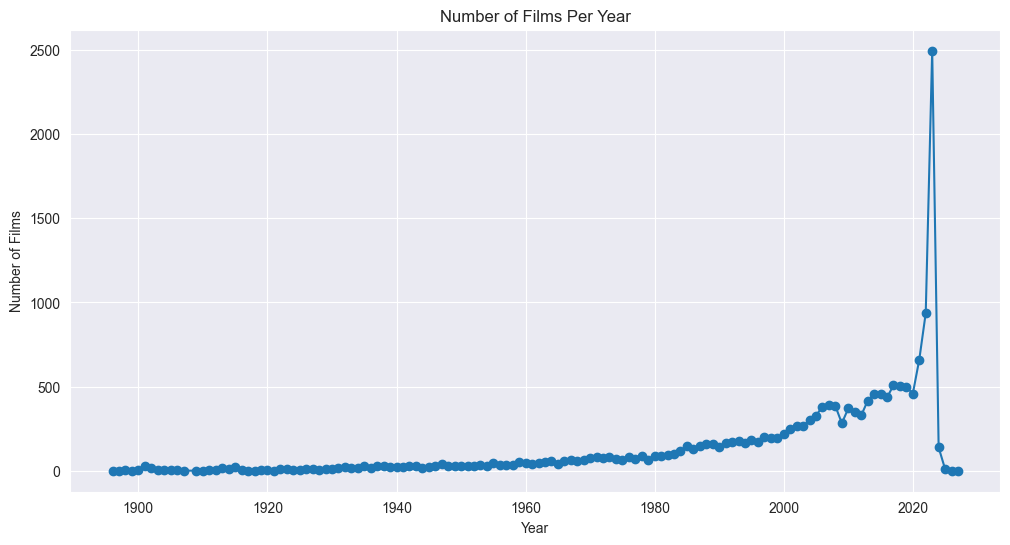

In [29]:
number_of_films_per_year =query_db( """
SELECT 
    EXTRACT(YEAR FROM release_date) AS release_year, 
    COUNT(*) AS num_films 
FROM Movies 
WHERE release_date IS NOT NULL 
GROUP BY release_year 
ORDER BY release_year
""", conn)

plt.figure(figsize=(12, 6))
plt.plot(number_of_films_per_year['release_year'], number_of_films_per_year['num_films'], marker='o')
plt.title('Number of Films Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



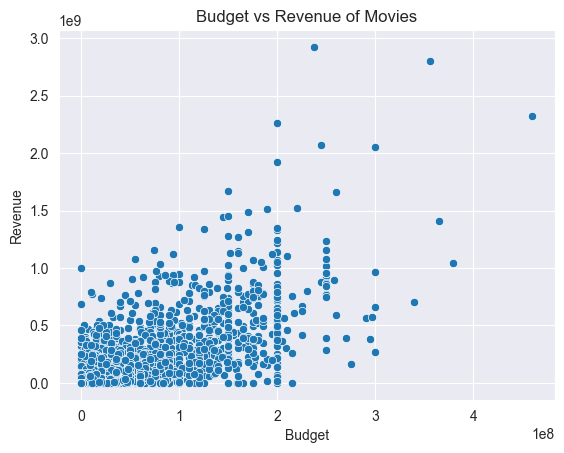

In [30]:
budget_vs_revenue =query_db( """
SELECT budget, revenue
FROM Movies
WHERE budget IS NOT NULL AND revenue IS NOT NULL;
""", conn)

sns.scatterplot(x='budget', y='revenue', data=budget_vs_revenue)
plt.title('Budget vs Revenue of Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



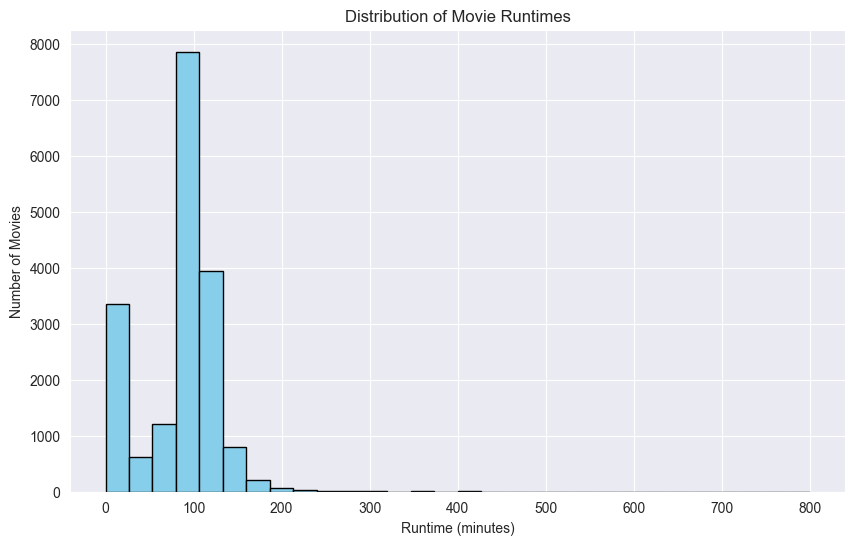

In [31]:
runtime_distribution =query_db( """
SELECT runtime
FROM Movies
WHERE runtime IS NOT NULL;
""", conn)

plt.figure(figsize=(10, 6))
plt.hist(runtime_distribution['runtime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



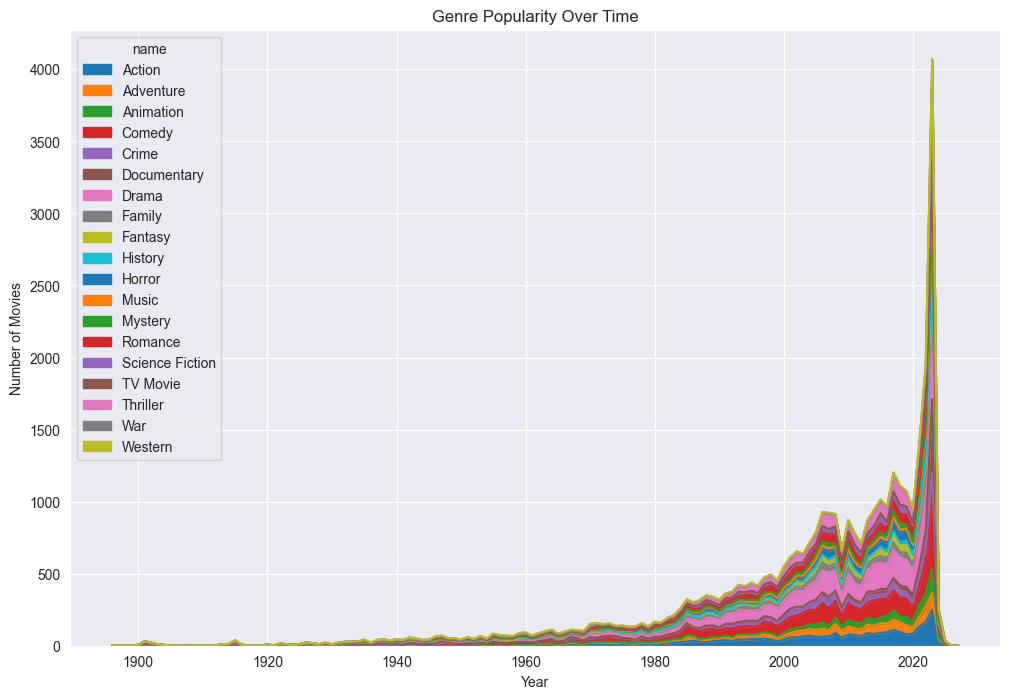

In [32]:
genre_popularity_over_time =query_db( """
SELECT EXTRACT(YEAR FROM Movies.release_date) as year, Genres.name, COUNT(*) as num_movies
FROM Movies
JOIN MovieGenres ON Movies.id = MovieGenres.movie_id
JOIN Genres ON MovieGenres.genre_id = Genres.id
GROUP BY year, Genres.name
ORDER BY year, Genres.name;
""", conn)

genre_pivot = genre_popularity_over_time.pivot(index='year', columns='name', values='num_movies').fillna(0)
genre_pivot.plot.area(figsize=(12, 8))
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



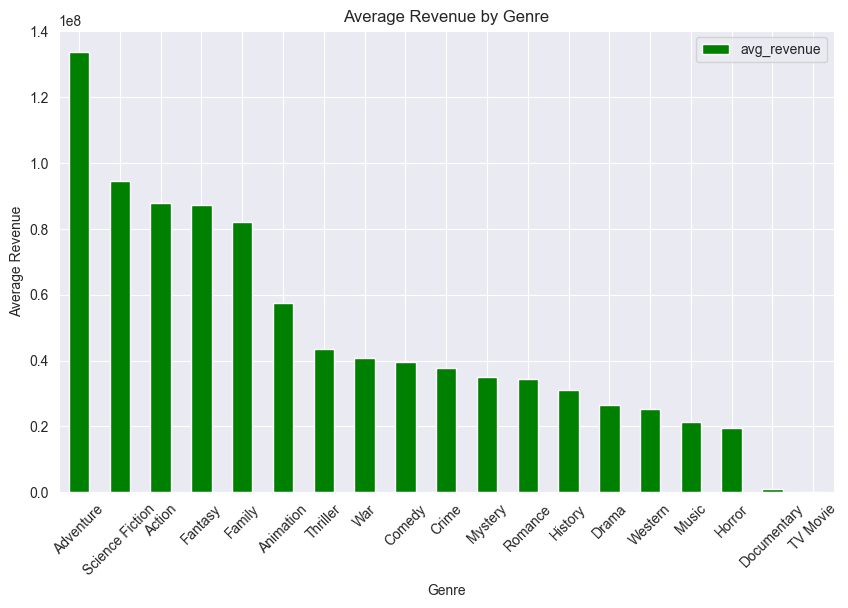

In [33]:
top_grossing_genres =query_db( """
SELECT Genres.name, AVG(Movies.revenue) as avg_revenue
FROM Movies
JOIN MovieGenres ON Movies.id = MovieGenres.movie_id
JOIN Genres ON MovieGenres.genre_id = Genres.id
GROUP BY Genres.name
ORDER BY avg_revenue DESC;
""", conn)

top_grossing_genres.plot(kind='bar', x='name', y='avg_revenue', color='green', figsize=(10, 6))
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



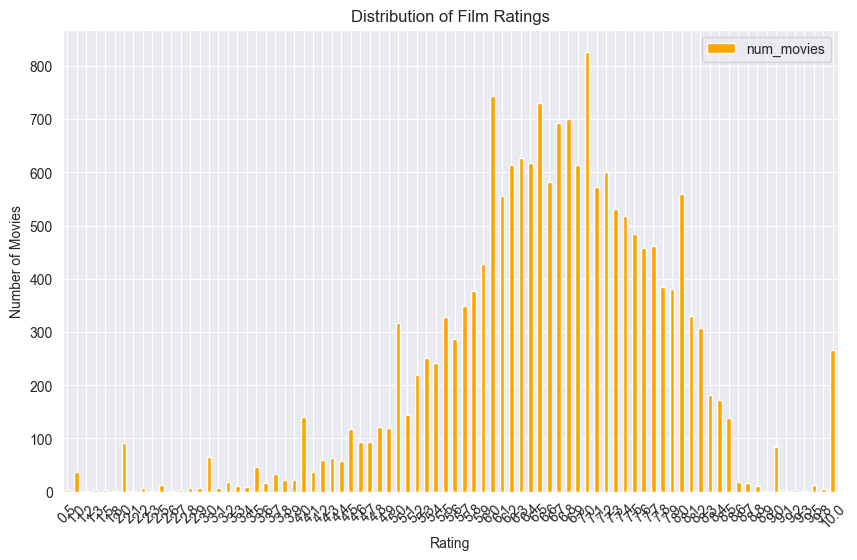

In [37]:
film_rating_analysis = query_db("""
SELECT movies_popularity.vote_average as rating, COUNT(*) as num_movies
FROM Movies
JOIN movies_popularity ON Movies.id = movies_popularity.movie_id
WHERE movies_popularity.vote_average > 0
GROUP BY movies_popularity.vote_average
ORDER BY movies_popularity.vote_average;
""", conn)

film_rating_analysis.plot(kind='bar', x='rating', y='num_movies', color='orange', figsize=(10, 6))
plt.title('Distribution of Film Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



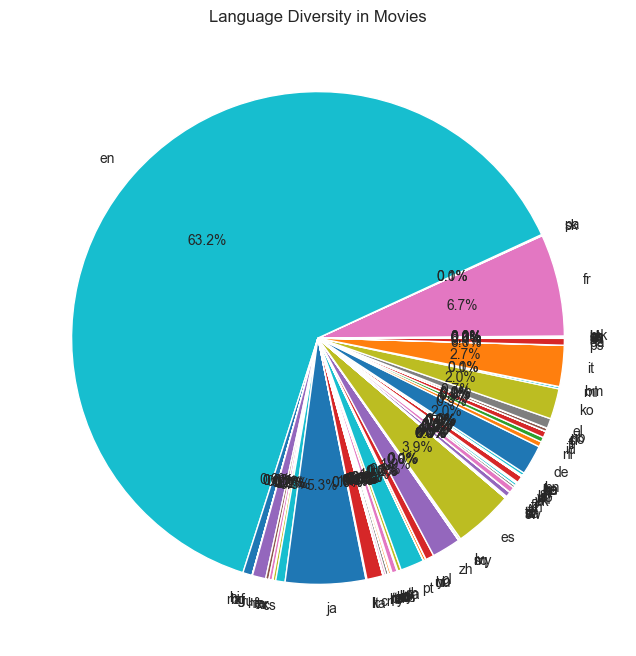

In [38]:
language_diversity_in_movies =query_db( """
SELECT original_language, COUNT(*) as num_movies
FROM Movies
GROUP BY original_language;
""", conn)

language_diversity_in_movies.set_index('original_language')['num_movies'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Language Diversity in Movies')
plt.ylabel('')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



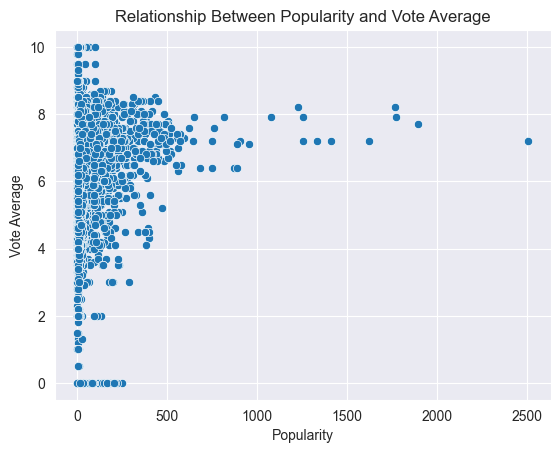

In [39]:
popularity_and_vote_analysis =query_db( """
SELECT popularity, vote_average
FROM movies_popularity
WHERE popularity IS NOT NULL AND vote_average IS NOT NULL;
""", conn)
sns.scatterplot(x='popularity', y='vote_average', data=popularity_and_vote_analysis)
plt.title('Relationship Between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



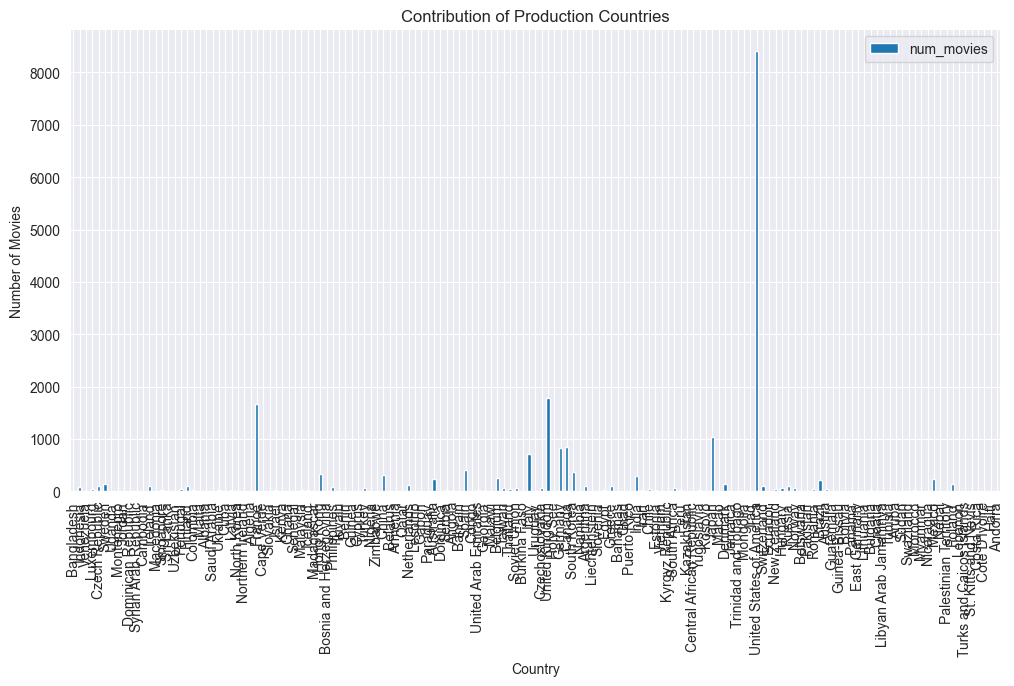

In [40]:
production_countries_contribution =query_db( """
SELECT ProductionCountries.name, COUNT(*) as num_movies
FROM MovieProductionCountries
JOIN ProductionCountries ON MovieProductionCountries.iso_3166_1 = ProductionCountries.iso_3166_1
GROUP BY ProductionCountries.name;
""", conn)

production_countries_contribution.plot(kind='bar', x='name', y='num_movies', figsize=(12, 6))
plt.title('Contribution of Production Countries')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



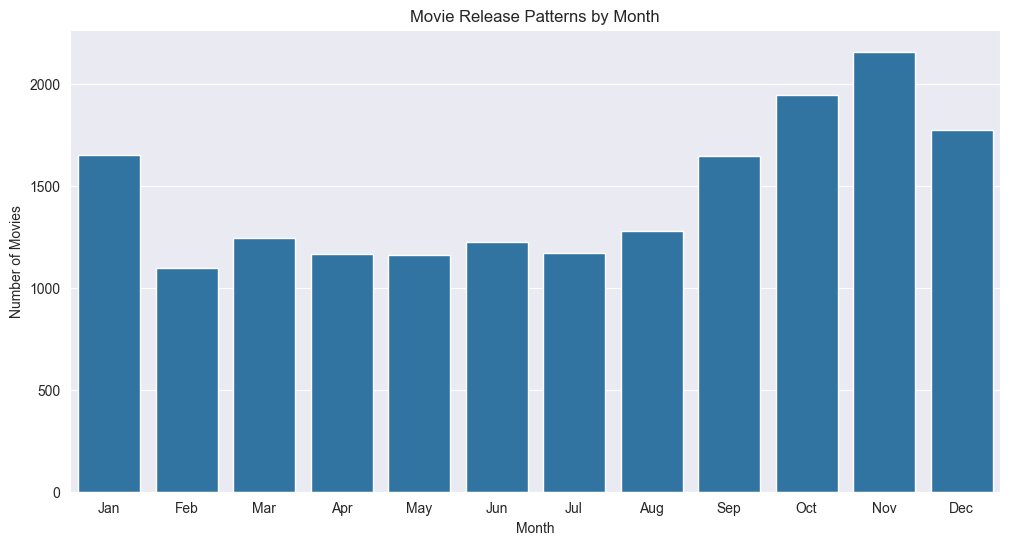

In [41]:
movie_release_pattern =query_db( """
SELECT EXTRACT(MONTH FROM release_date) as month, COUNT(*) as num_movies
FROM Movies
GROUP BY month
ORDER BY month;
""", conn)

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='num_movies', data=movie_release_pattern)
plt.title('Movie Release Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



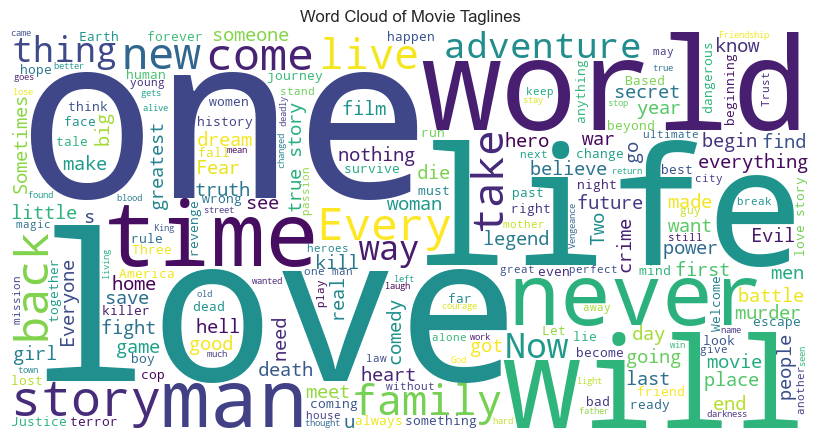

In [42]:
analysis_of_taglines =query_db( """
SELECT tagline
FROM Movies
WHERE tagline IS NOT NULL;
""", conn)


all_taglines = ' '.join(analysis_of_taglines['tagline'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_taglines)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud of Movie Taglines')
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



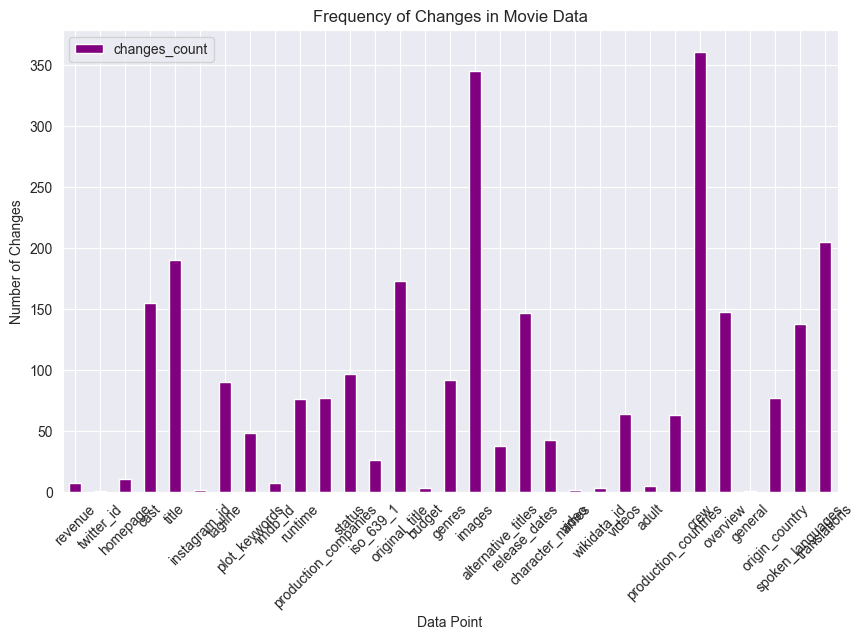

In [43]:
analysis_of_changelog =query_db( """
SELECT datapoint, COUNT(*) as changes_count
FROM Changes
GROUP BY datapoint;
""", conn)

analysis_of_changelog.plot(kind='bar', x='datapoint', y='changes_count', color='purple', figsize=(10, 6))
plt.title('Frequency of Changes in Movie Data')
plt.xlabel('Data Point')
plt.ylabel('Number of Changes')
plt.xticks(rotation=45)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



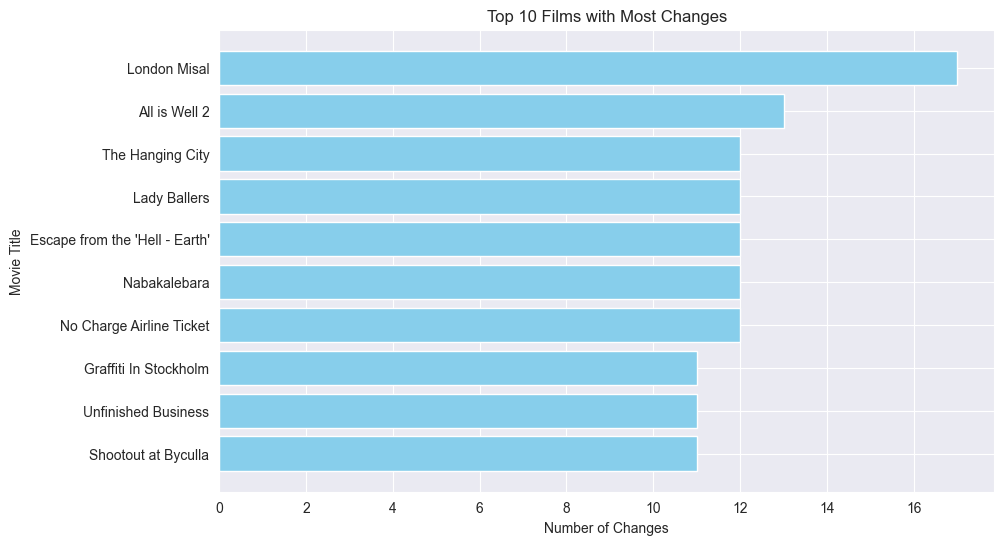

In [44]:
limit = 10
changes_per_movie =query_db( f"""
SELECT 
    Movies.title, 
    COUNT(Changes.movie_id) as change_count
FROM 
    Changes 
JOIN 
    Movies ON Changes.movie_id = Movies.id
GROUP BY 
    Movies.title
ORDER BY 
    change_count DESC
LIMIT {limit};
""", conn)

plt.figure(figsize=(10, 6))
plt.barh(changes_per_movie['title'], changes_per_movie['change_count'], color='skyblue')
plt.xlabel('Number of Changes')
plt.ylabel('Movie Title')
plt.title('Top 10 Films with Most Changes')
plt.gca().invert_yaxis()  
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_5572\2758919096.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



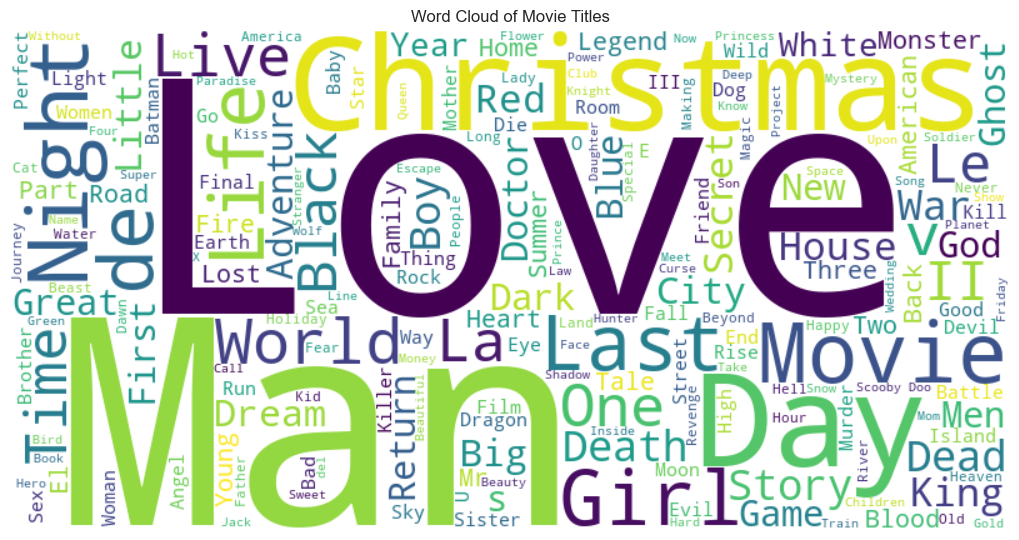

In [45]:
movie_titles_df =query_db( f"""
SELECT title
FROM Movies;
""", conn)

all_titles = ' '.join(movie_titles_df['title'].tolist())

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_titles)

plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Movie Titles')
plt.show()

In [47]:
# Close the database connection
conn.close()